<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Gabriel_Carmona;201773509-0;Nueva</h3>
    <h3 align="center">Jorge_Ludueña;201773507-4;Nueva</h3>
    <h3 align="center">Abril 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


In [52]:
from ipywidgets import interact 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import math
import pandas as pd
sns.set()
%matplotlib inline 


---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

In [53]:
from ipywidgets import interact 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
import random
import math
import pandas as pd
sns.set()
%matplotlib inline 

"""
#Función que permite mostrar el histograma de “Tenure by gender”, 
#de manera interactiva, variando los bins con los cual se presenta
"""
def plot_serie(a):
    x = pd.read_csv("churn.csv")
    efe = x[(x.gender == "Male")]
    ofo = x[(x.gender == "Female")]
    ele = [efe.tenure.values.reshape(3555,1), ofo.tenure.values.reshape(3488,1)]
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["blue", "orange"]]
    labels= ["Male", "Female"]
    _= plt.legend(handles, labels)
    _= plt.hist(ele,a)
    _= plt.title('Tenure by gender')
    _= plt.xlabel('Months')
    _= plt.ylabel('People')

    
"""
#Función que permite mostrar el histograma de “Tenure per Internet Service”, 
#de manera interactiva, variando los bins con los cual se presenta
"""
def histo1(a):
    x = pd.read_csv("churn.csv")
    efe = x[(x.gender == "Male")]
    ofo = x[(x.gender == "Female")]
    ele = [efe.tenure.values.reshape(3555,1), ofo.tenure.values.reshape(3488,1)]
    _= plt.hist(ele,a)
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["blue", "orange"]]
    labels= ["Fiber optic", "DLS"]
    plt.legend(handles, labels)
    _= plt.title('Tenure per Internet Service')
    _= plt.xlabel('Months')
    _= plt.ylabel('People')



x = pd.read_csv("churn.csv")

FileNotFoundError: [Errno 2] File b'churn.csv' does not exist: b'churn.csv'

In [54]:
efe = x[(x.InternetService == "Fiber optic")]
ofo = x[(x.InternetService == "DSL")]
ele = [efe.MonthlyCharges.values.reshape(3096,1), ofo.MonthlyCharges.values.reshape(2421,1)]
_= plt.boxplot(ele, labels=["Fiber optic", "DLS"])
_= plt.title('Monthly cost per Internet Service')
_= plt.xlabel('Internet Service')
_= plt.ylabel('Monthly Cost')

AttributeError: 'int' object has no attribute 'InternetService'

In [55]:
interact(histo1,a=(1,20))

interactive(children=(IntSlider(value=10, description='a', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.histo1(a)>

In [56]:
interact(plot_serie,a=(1,20))

interactive(children=(IntSlider(value=10, description='a', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_serie(a)>

Del boxplot presentado se puede observar que la mediana del costo mensual de la fibra óptica, está por sobre la mediana del coste de el servicio de DSL, por lo cual extraemos del dataset, que la fibra óptica posee, en la mayoría de los casos, un coste mensual mayor, por lo cual se puede decir que es un servicio más caro.

En base al histograma “Tenure per Internet Services”, se puede apreciar que la cantidad de meses que se queda una persona, tiende a ser entre 0 y 10, o 65 y 70. Es decir que la gente tiende a quedarse poco, o tiende a irse luego de un largo tiempo.

Por último, observando el histograma “Tenure by gender”, se puede concluir que, el tiempo que tiene un hombre y una mujer, tiende a ser muy parecido, de lo cual se puede deducir que no importa el sexo de la persona, no afectará en gran medida a su decisión de quedarse o cambiarse.

Para las preguntas b.1), b.2), c), d), e)  se utiliza pandas para obtener la cantidad total de los datos que cumplen una restricción (ser mujer, hombre, tener fibra óptica, etc), y las cantidades que cumplen 2 restricciones al mismo tiempo (ser hombre y tener DSL, ser mujer y tener fibra óptica, etc). Con esto  datos y reglas de probabilidad condicional, se calculan las probabilidades requeridas, para responder las preguntas. En el caso de MonthlyChargess y tenure se utilizo su media.

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

In [57]:
Totalfibra = len(x[x.InternetService == "Fiber optic"])

Femeninofibra= len(x[(x.gender == "Female") & (x.InternetService == "Fiber optic")])
Masculinofibra = len(x[(x.gender == "Male") & (x.InternetService == "Fiber optic")])

Probfemeninofibra = Femeninofibra/Totalfibra
Probmasculinofibra = Masculinofibra/Totalfibra



print("La probabilidad de que un cliente sea mujer dado que tiene fibra óptica es: \n" +str(Probfemeninofibra)+"\n")
print("La probabilidad de que un cliente sea hombre dado que tiene fibra óptica es: \n" +str(Probmasculinofibra)+"\n")

AttributeError: 'int' object has no attribute 'InternetService'

In [58]:
Totalnofibra = len(x[x.InternetService != "Fiber optic"])

Femeninonofibra = len(x[(x.gender == "Female")& (x.InternetService != "Fiber optic")])
Masculinonofibra = len(x[(x.gender == "Male")& (x.InternetService != "Fiber optic")])

Probafemeninonofibra = Femeninonofibra/Totalnofibra
Probamasculinonofibra = Masculinonofibra/Totalnofibra

print("La probabilidad de que un cliente sea mujer dado que no tiene fibra óptica es: \n" +str(Probafemeninonofibra)+"\n")
print("La probabilidad de que un cliente sea hombre dado que no tiene fibra óptica es: \n" +str(Probamasculinonofibra)+"\n")

AttributeError: 'int' object has no attribute 'InternetService'

Las probabilidades que deben sumar  aproximadamente 1, en este caso deben ser la probabilidad de que un cliente sea mujer dado que tiene fibra óptica con probabilidad de que un cliente sea hombre dado que tiene fibra óptica. Por otro lado, la probabilidad de que sea mujer dado que no tiene fibra óptica sumado a la probabilidad de que sea hombre dado que no tiene fibra óptica.

>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

In [59]:
Totalfemenino = len(x[x.gender == "Female"])
Totalmasculino = len(x[x.gender == "Male"])

Probafibramasculino = Masculinofibra/Totalmasculino
Probafibrafemenino = Femeninofibra/Totalfemenino
print("Probabilidad de que tenga fibra óptica dado que es hombre:")
print(Probafibramasculino)

print()
print("Probabilidad de que tenga fibra óptica dado que es mujer:")
print(Probafibrafemenino)

AttributeError: 'int' object has no attribute 'gender'

In [60]:
print("Cantidad de fibra optica que se encuentra bajo la media del costo mensual:")
print(len(x[(x.InternetService == "Fiber optic") & (x.MonthlyCharges < 70.35)]))
print()

print("Cantidad de fibra optica que se encuentra sobre la media del costo mensual:")
print(len(x[(x.InternetService == "Fiber optic") & (x.MonthlyCharges >= 70.35)]))
print()

print("Cantidad de DSL que se encuentra bajo la media del costo mensual:")
print(len(x[(x.InternetService == "DSL") & (x.MonthlyCharges < 70.35)]))
print()

print("Cantidad de DSL que se encuentra sobre la media del costo mensual:")
print(len(x[(x.InternetService == "DSL") & (x.MonthlyCharges >= 70.35)]))
print()

Cantidad de fibra optica que se encuentra bajo la media del costo mensual:


AttributeError: 'int' object has no attribute 'InternetService'

Considerando los cálculos obtenidos se tiene que la probabilidad que algún usuario tenga fibra óptica, dado que es hombre, es de aproximadamente 0.43, lo que nos dice que es menos probable que tenga fibra óptica, dado que es hombre. En el otro caso, la probabilidad de que tenga fibra óptica, dado que  es mujer, es de 0.45, lo que nos dice que es menos probable.

Esto se puede deber a que el costo mensual de la fibra óptica, generalmente está sobre la mediana de este (2941 vs 155, dado por los cálculos), lo que hace más probable que, tanto hombre como mujer, prefieran DSL o simplemente no tener servicio de internet.

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

In [61]:
Totaldsl = len(x[x.InternetService == "DSL"])
Total = len(x[x.InternetService != "No"])
Totalfugaservicios= len(x[(x.Churn=="Yes")&(x.InternetService != "No")])
Fugafibra = len(x[(x.InternetService == "Fiber optic")&(x.Churn == "Yes")])

print("Probabilidad de fuga dado que tiene fibra óptica:")
print(Fugafibra/Totalfibra)
print()

fugadsl = len(x[(x.InternetService == "DSL")&(x.Churn == "Yes")])

print("Probabilidad de fuga dado que tiene DSL:")
print(fugadsl/Totaldsl)

AttributeError: 'int' object has no attribute 'InternetService'

Como se puede apreciar en los cálculos, la probabilidad de que alguien se fugue dado que tiene fibra óptica, es de 0,42 aproximadamente, lo cual es mayor a la probabilidad de que se fugue dado que tiene DSL, el cual es 0.19 aproximadamente. Por lo cual se puede decir que la fibra óptica es más propensa a que alguien se fugue.

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

In [62]:
Totalfuga = len(x[x.Churn == "Yes"])


Mensualsobremedia = len(x[x.MonthlyCharges >= 70.35])
Mensualbajomedia = len(x[x.MonthlyCharges < 70.35])

Sobremediafuga = len(x[(x.MonthlyCharges >= 70.35)&(x.Churn == "Yes")])

Bajomediafuga = len(x[(x.MonthlyCharges < 70.35)&(x.Churn == "Yes")])

Condicionalfugasobre = Sobremediafuga/Mensualsobremedia
Condicionalsobrefuga = Sobremediafuga/Totalfuga

Condicionalfugabajo = Bajomediafuga/Mensualbajomedia
Condicionalbajofuga = Bajomediafuga/Totalfuga

print("Fuga dado que esta sobre la mediana de costo mensual: " + str(Condicionalfugasobre))
print("Estar sobre la mediana de costo mensual dado que se fugo: " + str(Condicionalsobrefuga))

print("\n")

print("Fuga dado que esta bajo la mediana de costo mensual: " + str(Condicionalfugabajo))
print("Estar bajo la mediana de costo mensual dado que se fugo: " + str(Condicionalbajofuga))

AttributeError: 'int' object has no attribute 'Churn'

En base a los cálculos, podemos observar que la única probabilidad mayor a 0,5, es la probabilidad de que esté sobre la mediana del costo mensual, dado que se fugó, por lo cual se puede concluir que el cargo mensual es un buen predictor de la fuga, si es que se utiliza la mediana de costo mensual como base. Sin embargo, el otro cálculo, fuga dado que está sobre la media, presenta una probabilidad muy baja, por lo cual podemos decir que la fuga no es un buen predictor del cargo mensual.

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

In [63]:
Sobretenure = len(x[x.tenure >= 29])
Bajotenure = len(x[x.tenure < 29])

Mensualsobremedia = len(x[x.MonthlyCharges >= 70.35])
Mensualbajomedia = len(x[x.MonthlyCharges < 70.35])

Bajosobre = len(x[(x.MonthlyCharges < 70.35)&(x.tenure >= 29)])
Bajobajo = len(x[(x.MonthlyCharges < 70.35)&(x.tenure < 29)])
Sobrebajo = len(x[(x.MonthlyCharges >= 70.35)&(x.tenure < 29)])
Sobresobre = len(x[(x.MonthlyCharges >= 70.35)&(x.tenure >= 29)])

SStS = Sobresobre/Sobretenure
BStS = Bajosobre/Sobretenure
SBtB = Sobrebajo/Bajotenure
BBtB = Bajobajo/Bajotenure
SSmS = Sobresobre/Mensualsobremedia
SBmS = Sobrebajo/Mensualsobremedia
BSmB = Bajosobre/Mensualbajomedia
BBmB = Bajobajo/Mensualbajomedia

print("Probabilidad de estar sobre la media de coste mensual dado que la estadia esta sobre la media")
print(SStS)
print()

print("Probabilidad de estar bajo la media de coste mensual dado que la estadia esta sobre la media")
print(BStS)
print()

print("Probabilidad de estar sobre la media de coste mensual dado que la estadia esta bajo la media")
print(SBtB)
print()

print("Probabilidad de estar bajo la media de coste mensual dado que la estadia esta bajo la media")
print(BBtB)
print()

print("Probabilidad de estar sobre la media de estadia, dado que se esta sobre la media de coste mensual")
print(SSmS)
print()

print("Probabilidad de estar bajo la media de estadia, dado que se esta sobre la media de coste mensual")
print(SBmS)
print()

print("Probabilidad de estar sobre la media de estadia, dado que se esta bajo la media de coste mensual")
print(BSmB)
print()

print("Probabilidad de estar bajo la media de estadia, dado que se esta bajo la media de coste mensual")
print(BBmB)
print()

AttributeError: 'int' object has no attribute 'tenure'

En base a las diferentes probabilidades calculadas, podemos observar que ninguna que se presenta se aleja de la probabilidad 0,5 por lo cual se puede concluir que ninguno de los dos datos es buen predictor del otro.

## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

En el siguiente código se realiza el experimento 10 veces de tal forma que cuando una bolita tenga éxito se deje de lanzar bolitas, y eso 10 veces. Para así ir sumando la cantidad de bolitas que fueron necesarias para que resulte por primera vez en video. y de ahí se sumaron el número de bolitas utilizadas para cada repetición y se dividió ese valor por 10.

In [64]:
#Esta función lo que hace es realizar el experimento 10 veces, sumar la cantidad de bolitas utilizadas antes de que
#La prueba haya sido realizada a la primera. De ahí ese valor se dividió por 10, que es la cantidad de veces que se 
#repitió el experimento.
Prob = 3/5 * 3/5 * 4/5 * 2/3 * 3/10
i = 0
numero_de_intentos = 0
j = 0
while(j < 10):
    i = 0
    while(i < 100000):
        boi = random.randint(1,3750)
        i += 1
        if(boi <= 216):
            break
    j += 1
    numero_de_intentos += i

if(numero_de_intentos != int(numero_de_intentos)):
    numero_de_intentos += 1
print("En promedio, se tendrá que ponder en marcha el experimento " + str(int(numero_de_intentos/10)) + " veces")

En promedio, se tendrá que ponder en marcha el experimento 14 veces


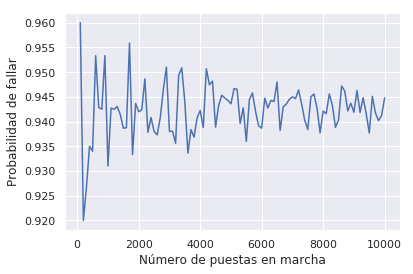

In [65]:
#Aquí se realiza el experimento para una diferente cantidad de bolitas, por lo que luego se calculo la probabilidad de
#fallar para cada cantidad de bolitas y se graficó la probabilida de no funcionar en función de la cantidad de bolitas
#utilizadas.
j = 0
achuntar = 0
probabilidades_x = []
probabilidades_y = []
while(j < 100):
    i = 0
    while(i < 100+j*100):
        x = random.randint(1,3750)
        i += 1
        if(x <= 216):
            achuntar += 1
    probabilidades_x.append(100+j*100)
    probabilidades_y.append(1-achuntar/(100+j*100))
    j += 1
    achuntar = 0
plt.plot(probabilidades_x, probabilidades_y)
plt.xlabel("Número de puestas en marcha")
plt.ylabel("Probabilidad de fallar")
plt.show()

Se puede visualizar en el gráfico que la probabilidad a medida que los números de lanzamientos van aumentando, la probabilidad de que la bolita falle se va a acercando entre los valores 0,945 y 0,940. Además que si el número de lanzamientos en pequeño, el valor de la probabilidad es bastante fluctuante.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada estapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

En el siguiente código se calculan las cantidades de bolitas que fallan en cada una de las etapas, además de indicar cuantas las lograron.

In [66]:
e1 = 1000*2/5
e2 = (1000-e1)*2/5
e3 = (1000-e1-e2)*1/5
e4 = (1000-e1-e2-e3)*1/3
e5 = (1000-e1-e2-e3-e4)*7/10


print(str(int(e1)) + " bolitas no pudieron pasar la primera etapa")
print(str(int(e2)) + " bolitas no pudieron pasar la segunda etapa")
print(str(int(e3)) + " bolitas no pudieron pasar la tercera etapa")
print(str(int(e4)) + " bolitas no pudieron pasar la cuarta etapa")
print(str(int(e5)) + " bolitas no pudieron pasar la quinta etapa")
print(str(int(1000-(e1+e2+e3+e4+e5))+1) + " bolitas pudieron pasar todas las etapas")

400 bolitas no pudieron pasar la primera etapa
240 bolitas no pudieron pasar la segunda etapa
72 bolitas no pudieron pasar la tercera etapa
96 bolitas no pudieron pasar la cuarta etapa
134 bolitas no pudieron pasar la quinta etapa
58 bolitas pudieron pasar todas las etapas


En el siguiente código, se realiza empíricamente el cálculo de la probabilidad de fallo haciendo el lanzamiento de las bolitas utilizando la función random para simular las probabilidades. Ahora, si es que la bolita falla en una etapa se agrega a las bolitas que fallan en esa etapa y se pasa a la siguiente bolita.

In [67]:
n = 0
e12 = 0
e22 = 0
e32 = 0
e42 = 0
e52 = 0
lologro = 0
while(n < 1000):
    x = random.randint(0,4)
    if(x < 2):
        e12 += 1
    else:
        x = random.randint(0,4)
        if(x < 2):
            e22 += 1
        else:
            x = random.randint(0,4)
            if(x < 1):
                e32 +=1
            else:
                x = random.randint(0,2)
                if(x < 1):
                    e42 += 1
                else:
                    x = random.randint(0,9)
                    if(x < 7):
                        e52 += 1
                    else:
                        lologro += 1
    n+=1
print(str(e12) + " bolitas que fallaron en la primera etapa")
print(str(e22) + " bolitas que fallaron en la segunda etapa")
print(str(e32) + " bolitas que fallaron en la tercera etapa")
print(str(e42) + " bolitas que fallaron en la cuarta etapa")
print(str(e52) + " bolitas que fallaron en la quinta etapa")
print(str(lologro) + " bolitas que pasaron todas las etapas")

385 bolitas que fallaron en la primera etapa
246 bolitas que fallaron en la segunda etapa
72 bolitas que fallaron en la tercera etapa
95 bolitas que fallaron en la cuarta etapa
139 bolitas que fallaron en la quinta etapa
63 bolitas que pasaron todas las etapas


Se puede observar de los resultados obtenidos que los resultados se acercan a los valores teóricos mostrados anteriormente, solo que con que cierta diferencia, la cual depende harto del azar realizado. Pero se ve la cercanía entre el resultado teórico y resultado empírico.

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

La función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita es una función $f(x)$, tal que x es el estado en cual para la bola. Donde si x es 1 es que falló en el estado 1, si x es 2 es que falló en el estado 2, si x es 3 es que falló en el estado 3, si x es 4 es que falló en el estado 4, si x es 5 es que falló en el estado 5 y si x es 6 entonces la bolita logró hacer el circuito.

In [68]:
estado1 = 2/5
estado2 = (3*2)/(5*5)
estado3 = (3*3*1)/(5*5*5)
estado4 = (3*3*4*1)/(5*5*5*3)
estado5 = (3*3*4*2*7)/(5*5*5*3*10)
print("f(1) = " + str(estado1))
print("f(2) = " + str(estado2))
print("f(3) = " + str(estado3))
print("f(4) = " + str(estado4))
print("f(5) = " + str(estado5))
print("f(6) = " + str(Prob))

f(1) = 0.4
f(2) = 0.24
f(3) = 0.072
f(4) = 0.096
f(5) = 0.1344
f(6) = 0.0576


>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

En el siguiente código se realiza el experimento con 1000 bolitas utilizando la función de probabilidad anterior mostrada.

415 bolitas que fallaron en la etapa 1
247 bolitas que fallaron en la etapa 2
75 bolitas que fallaron en la etapa 3
93 bolitas que fallaron en la etapa 4
125 bolitas que fallaron en la etapa 5
45 bolitas que lograron pasar todas las etapas


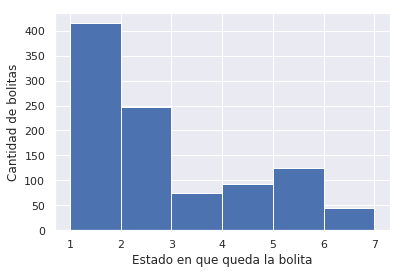

In [69]:
i = 0
e1 = 0
e2 = 0
e3 = 0
e4 = 0
e5 = 0
f = 0
l = []
while(i < 1000):
    x = random.random()
    if(x <= estado1):
        e1 += 1
        l.append(1)
    elif(estado1 < x <= estado1 + estado2):
        e2 += 1
        l.append(2)
    elif(estado1 + estado2 < x <= estado1 + estado2 + estado3):
        e3 += 1
        l.append(3)
    elif(estado1 + estado2 + estado3 < x <= estado1 + estado2 + estado3 + estado4):
        e4 += 1
        l.append(4)
    elif(estado1 + estado2 + estado3 + estado4 < x <= estado1 + estado2 + estado3 + estado4 + estado5):
        e5 += 1
        l.append(5)
    else:
        f += 1
        l.append(6)
    i+=1
print(str(e1) +  " bolitas que fallaron en la etapa 1")
print(str(e2) +  " bolitas que fallaron en la etapa 2")
print(str(e3) +  " bolitas que fallaron en la etapa 3")
print(str(e4) +  " bolitas que fallaron en la etapa 4")
print(str(e5) +  " bolitas que fallaron en la etapa 5")
print(str(f) + " bolitas que lograron pasar todas las etapas")
l.sort()
plt.hist(l,bins=[1,2,3,4,5,6,7])
plt.xlabel("Estado en que queda la bolita")
plt.ylabel("Cantidad de bolitas")
plt.show()

Nota: En el gráfico que las bolitas que están entre n y n+1 significa que la bolita se cayó en el estado n.
Por ejemplo entre los x 1 y 2 son las bolas que se cayeron en el estado 1.

Se puede observar que los valores obtenidos, utilizando la función de probabilidad mostrada en la pregunta c, son bastante cercanos a los obtenidos en la pregunta b, por lo que la función de probabilidad estaría bien creada.

Además observando el histograma se ve como la mayoría de las bolitas fallan en el estado 1 y el estado 2, luego en el estado 3 y 4 son cercanos entre ellos, pero la cantidad de bolitas fallidas aumentan en el estado 5, y finalmente que la cantidad de bolitas que logran realizar todo el circuito es bastante baja a la cantidad de bolitas lanzadas, aproximadamente 0,05 bolitas logran hacer el circuito.

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

Si separo los perros en grupos de K perros, eso significa que tendre $\dfrac{500}{K}$ grupos.

Ahora bien, como no conosco la cantidad de perros enfermos, entonces tendré que si o si realizar la prueba, por lo menos, $\dfrac{500}{K}$.

Luego, si por cada grupo en que la prueba salga positivo, realizare K veces la prueba.

Por lo que nos queda la siguiente función $f(K) = \dfrac{500}{K} + R*K$, donde R representa la cantidad de veces que la prueba salio positiva.

Ahora, para obtener un K mínimo teórico, procedemos a derivar la función anterior.

$f'(K) = -\dfrac{500}{K²} + R = 0$

$\dfrac{500}{K²} = R$

$K = \sqrt{\dfrac{500}{R}}$

Para terminar, este problema lo podemos asemejar a la distribución hipergeométrica, ya que se realizan pruebas a un grupo de K perros de un población original de 500 perros, lo cual describe básicamente la estructura de la distribución hipergeométrica, sólo que añadiendo el hecho de que si ya revisó un grupo no los devuelve y la población cambia. Pero si no describe la distribución antes mencionada.

>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en b)

En el siguiente código, se realiza la creación de una población de 500 perros donde 8 están infectados, y luego se revisa todos los k posibles que se puedan tomar (divisores de 500) y luego se calcula la cantidad de revisiones que se realizan.

In [70]:
perros = []
i = 0
while(i < 500):
    perros.append(0)
    i += 1
j = 0
yainfectados = []
while(j < 8):
    x = random.randint(0,499)
    if x not in yainfectados:
        perros[x] = 1
        yainfectados.append(x)
        j += 1
k = 1
k_menor = 0
menor = 5000
while(1):
    numero_rev = 0
    xd = 0
    if(500/k == int(500/k)):
        j = 0
        while(j < 500/k):
            grupos = []
            i = 0
            while(i < k):
                grupos.append(perros[j*k+i])
                i += 1
            numero_rev += 1
            if(1 in grupos):
                xd += 1
                numero_rev += k
            j += 1
        if(numero_rev < menor):
            menor = numero_rev
            k_menor = k
            xd_menor = xd
            
    k += 1
    if(k == 500):
        break
    
print("Se obtuvo que el K que minizaba la cantidad de veces que se realizará la prueba es " + str(k_menor))
print("Con este K, en esta simulación se realizaron " + str(menor) + " pruebas")
print("La cantidad de grupos revisados fue " + str(xd_menor))

Se obtuvo que el K que minizaba la cantidad de veces que se realizará la prueba es 10
Con este K, en esta simulación se realizaron 130 pruebas
La cantidad de grupos revisados fue 8


Ahora comparando esto con lo obtenido en la pregunta a se observa que aproximadamente el valor de K teórico con los valores mostrados anteriormente, daría un valor cercano a un K = 10.
Obviamente, el valor obtenido teóricamente en la pregunta a sería más que nada una estimación, ya que no puedo tener 0,1 perritos, pero la idea general está ahí.

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

En el siguiente código, se realizá la misma lógica de la pregunta anterior, con el simple cambio que cuando uno encuentre los 8 perros enfermos se parará el experimento.

In [71]:
perros = []
i = 0
while(i < 500):
    perros.append(0)
    i += 1
j = 0
yainfectados = []
while(j < 8):
    x = random.randint(0,499)
    if x not in yainfectados:
        perros[x] = 1
        yainfectados.append(x)
    j += 1
k = 1
menor_k = 1293823
numero_intentos_menor = 10123912
while(1):
    numeros_intentos = 0
    perritos_encontrado = 0
    if(500/k == int(500/k)):
        j = 0
        while(j < 500/k):
            i = 0
            grupos = []
            while(i < k):
                grupos.append(perros[j*k+i])
                i += 1
            numeros_intentos += 1
            if(1 in grupos):
                i = 0
                while(i < k):
                    if(grupos[i] == 1):
                        perritos_encontrado += 1
                    numeros_intentos += 1
                    if(perritos_encontrado == 8):
                        break
                    i += 1
            if(perritos_encontrado == 8):
                break
            j += 1
        if(numeros_intentos < numero_intentos_menor):
            numero_intentos_menor = numeros_intentos
            menor_k = k
    if(k == 500):
        break
    k += 1
print("Se obtuvo que el K que minizaba la cantidad de veces que se realizará la prueba es " + str(menor_k))
print("Con este K, en esta simulación se realizaron " + str(numero_intentos_menor) + " pruebas")
                        

Se obtuvo que el K que minizaba la cantidad de veces que se realizará la prueba es 10
Con este K, en esta simulación se realizaron 112 pruebas


Comparando los resultados aquí obtenidos junto a los resultados de la pregunta b, se puede observar que de todas maneras el K que minimiza la cantidad de pruebas a realizar seguirá siendo 10, ya que de toda maneras esa será la forma más eficiente, pero la cantidad de revisiones que se realizarán serán menor a la cantidad anterior, ya que si uno encuentra los 8 perros infectados no tiene para que seguir revisando, ya que sabe que hay 8 no más ni menos.


## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)